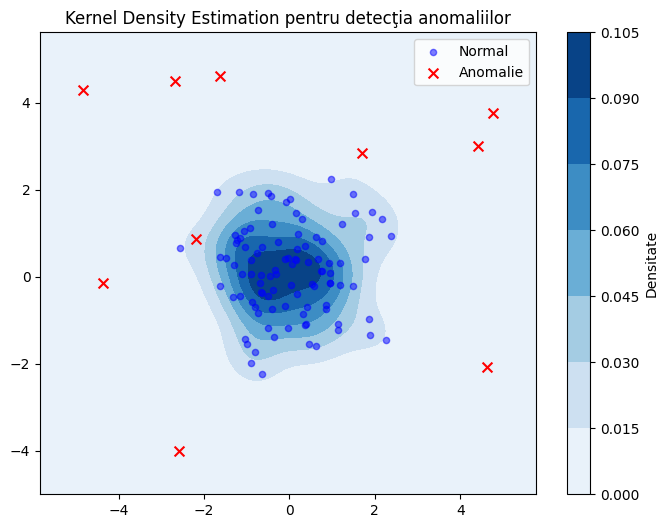

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generating random data
np.random.seed(0)
normal_data = np.random.randn(100, 2)  # Normal data points
anomaly_data = np.random.uniform(low=-5, high=5, size=(10, 2))  # Anomalies

# Concatenating normal and anomaly data
data = np.vstack([normal_data, anomaly_data])

# Fitting kernel density estimation
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(data)

# Generating meshgrid for contour plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
z = np.exp(kde.score_samples(xy))
z = z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, z, cmap='Blues')
plt.colorbar(label='Densitate')
plt.scatter(normal_data[:, 0], normal_data[:, 1], s=20, color='blue', alpha=0.5, label='Normal')
plt.scatter(anomaly_data[:, 0], anomaly_data[:, 1], s=50, color='red', marker='x', label='Anomalie')
plt.title('Kernel Density Estimation pentru detecţia anomaliilor')
plt.legend()
plt.savefig('kde_anomalies.pdf')
plt.show()
